# Import the Librarys

In [161]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Read Data

In [162]:
df = pd.read_csv('dirty_supermarket.csv')

# Exploring Data

In [163]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-19,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [164]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
1002,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.291,69.111,2/22/2019,15:33,Cash,65.82,4.761905,3.291,4.1
1003,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.919,649.299,2/18/2019,13:28,Cash,618.38,4.761905,30.919,6.6
1004,540-11-4336,A,Yangon,Normal,Male,Food and beverages,24.94,9,11.223,235.683,01-11-19,16:49,Credit card,224.46,4.761905,11.223,5.6
1005,448-81-5016,A,Yangon,Normal,Male,Health and beauty,59.77,2,5.977,125.517,03-11-19,12:01,Credit card,119.54,4.761905,5.977,5.8
1006,142-72-4741,C,Naypyitaw,Member,Male,Fashion accessories,93.20,2,9.320,195.720,2/28/2019,18:37,Credit card,186.40,4.761905,9.320,6.0


In [165]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

# Data Preprocessing

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1007 non-null   object 
 1   Branch                   1007 non-null   object 
 2   City                     1007 non-null   object 
 3   Customer type            1007 non-null   object 
 4   Gender                   1007 non-null   object 
 5   Product line             1007 non-null   object 
 6   Unit price               1007 non-null   float64
 7   Quantity                 1007 non-null   int64  
 8   Tax 5%                   1007 non-null   float64
 9   Total                    1007 non-null   float64
 10  Date                     1007 non-null   object 
 11  Time                     1007 non-null   object 
 12  Payment                  1007 non-null   object 
 13  cogs                     1007 non-null   float64
 14  gross margin percentage 

In [167]:
df.describe().round(2) 

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1007.00,1007.00,1007.00,1007.00,1007.00,1007.00,1007.00,1007.00
mean,55.83,5.50,15.37,322.80,307.43,4.76,15.37,6.97
std,26.52,2.92,11.68,245.35,233.67,0.00,11.68,1.72
min,10.08,1.00,0.51,10.68,10.17,4.76,0.51,4.00
25%,33.05,3.00,5.98,125.52,119.54,4.76,5.98,5.50
50%,55.57,5.00,12.08,253.68,241.60,4.76,12.08,6.90
75%,78.22,8.00,22.43,471.01,448.58,4.76,22.43,8.45
max,99.96,10.00,49.65,1042.65,993.00,4.76,49.65,10.00


# Check is null 

In [168]:
df.isnull()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1003,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1004,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1005,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Check if a duplicates 

In [169]:
df.duplicated().sum()

8

# Drop duplicates

In [170]:
df = df.drop_duplicates()
df.shape

(999, 17)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 1003
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               999 non-null    object 
 1   Branch                   999 non-null    object 
 2   City                     999 non-null    object 
 3   Customer type            999 non-null    object 
 4   Gender                   999 non-null    object 
 5   Product line             999 non-null    object 
 6   Unit price               999 non-null    float64
 7   Quantity                 999 non-null    int64  
 8   Tax 5%                   999 non-null    float64
 9   Total                    999 non-null    float64
 10  Date                     999 non-null    object 
 11  Time                     999 non-null    object 
 12  Payment                  999 non-null    object 
 13  cogs                     999 non-null    float64
 14  gross margin percentage  

In [172]:
df.duplicated().sum()

0

In [173]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

# Sorting by Branches

In [174]:
df.sort_values('Branch', ascending=True, inplace = True)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
531,287-83-1405,A,Yangon,Normal,Male,Health and beauty,25.43,6,7.6290,160.2090,02-12-19,19:01,Ewallet,152.58,4.761905,7.6290,7.0
530,827-77-7633,A,Yangon,Normal,Male,Sports and travel,98.09,9,44.1405,926.9505,2/17/2019,19:41,Cash,882.81,4.761905,44.1405,9.3
526,719-89-8991,A,Yangon,Member,Female,Sports and travel,91.41,5,22.8525,479.9025,2/25/2019,16:03,Ewallet,457.05,4.761905,22.8525,7.1
525,534-01-4457,A,Yangon,Normal,Male,Food and beverages,81.71,6,24.5130,514.7730,1/27/2019,14:36,Credit card,490.26,4.761905,24.5130,8.0


In [175]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
726,149-14-0304,C,Naypyitaw,Member,Female,Health and beauty,28.50,8,11.4000,239.4000,02-06-19,14:24,Cash,228.00,4.761905,11.4000,6.6
724,592-46-1692,C,Naypyitaw,Member,Female,Food and beverages,36.77,7,12.8695,270.2595,01-11-19,20:10,Cash,257.39,4.761905,12.8695,7.4
469,746-19-0921,C,Naypyitaw,Normal,Male,Food and beverages,21.58,1,1.0790,22.6590,02-09-19,10:02,Ewallet,21.58,4.761905,1.0790,7.2
464,320-32-8842,C,Naypyitaw,Member,Female,Food and beverages,22.62,1,1.1310,23.7510,3/17/2019,18:58,Cash,22.62,4.761905,1.1310,6.4
328,719-76-3868,C,Naypyitaw,Member,Male,Food and beverages,94.26,4,18.8520,395.8920,03-12-19,16:30,Cash,377.04,4.761905,18.8520,8.6


# Check if Outlier in Total column

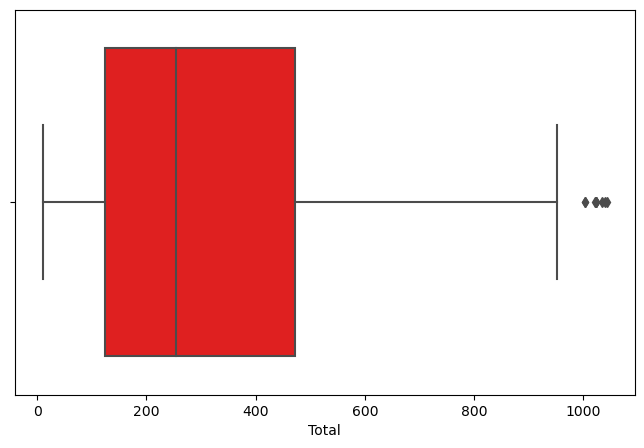

In [176]:
q1 = df['Total'].quantile(0.25)
q3 = df['Total'].quantile(0.75)
iqr = q3 - q1

plt.figure(figsize=(8,5))
sns.boxplot(x=df['Total'],color='red')
plt.show()


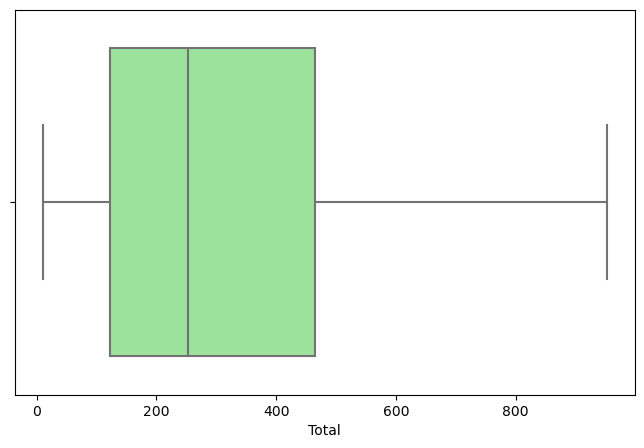

In [177]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['Total'] >= lower_bound) & (df['Total'] <= upper_bound)]
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Total'],color='lightgreen')
plt.show()


# Drop Unused Column

In [178]:
df.drop('gross income', axis=1, inplace=True)

In [179]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-19,13:08,Ewallet,522.83,4.761905,9.1
531,287-83-1405,A,Yangon,Normal,Male,Health and beauty,25.43,6,7.6290,160.2090,02-12-19,19:01,Ewallet,152.58,4.761905,7.0
530,827-77-7633,A,Yangon,Normal,Male,Sports and travel,98.09,9,44.1405,926.9505,2/17/2019,19:41,Cash,882.81,4.761905,9.3
526,719-89-8991,A,Yangon,Member,Female,Sports and travel,91.41,5,22.8525,479.9025,2/25/2019,16:03,Ewallet,457.05,4.761905,7.1
525,534-01-4457,A,Yangon,Normal,Male,Food and beverages,81.71,6,24.5130,514.7730,1/27/2019,14:36,Credit card,490.26,4.761905,8.0


In [180]:
df.to_csv('clean_supermarket.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-19,13:08,Ewallet,522.83,4.761905,9.1
531,287-83-1405,A,Yangon,Normal,Male,Health and beauty,25.43,6,7.6290,160.2090,02-12-19,19:01,Ewallet,152.58,4.761905,7.0
530,827-77-7633,A,Yangon,Normal,Male,Sports and travel,98.09,9,44.1405,926.9505,2/17/2019,19:41,Cash,882.81,4.761905,9.3
526,719-89-8991,A,Yangon,Member,Female,Sports and travel,91.41,5,22.8525,479.9025,2/25/2019,16:03,Ewallet,457.05,4.761905,7.1
525,534-01-4457,A,Yangon,Normal,Male,Food and beverages,81.71,6,24.5130,514.7730,1/27/2019,14:36,Credit card,490.26,4.761905,8.0


# Visualization

# Best selling product lines

<AxesSubplot:ylabel='Product line'>

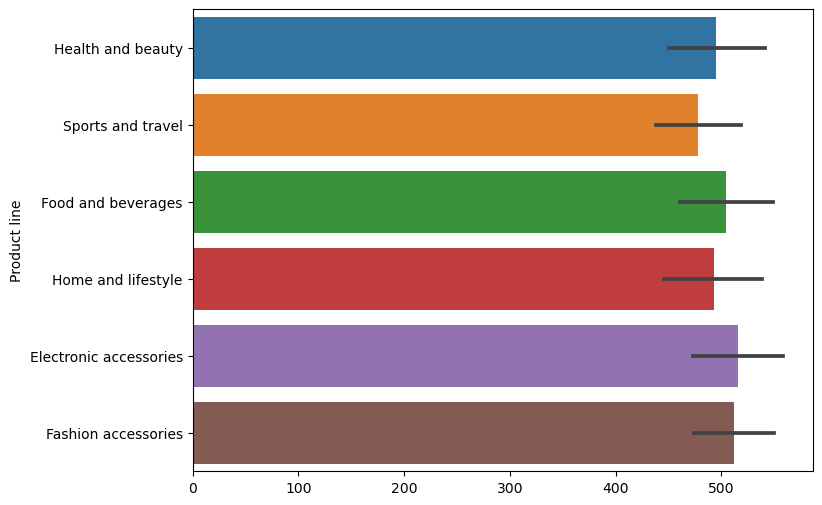

In [181]:
plt.figure(figsize=(8,6))
sns.barplot(x=df.index, y=df['Product line'])

# Which payment method more used

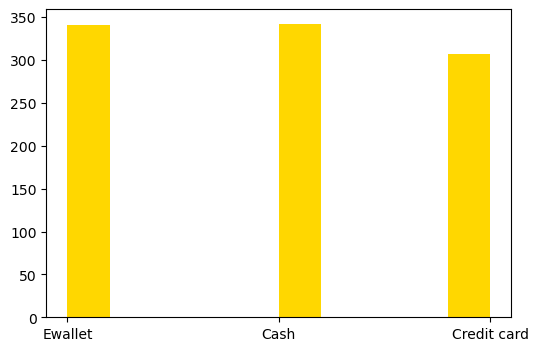

In [182]:
plt.figure(figsize=(6,4))
plt.hist(df['Payment'],bins=10,color='gold')
plt.show()

# Heatmap correlations

<AxesSubplot:>

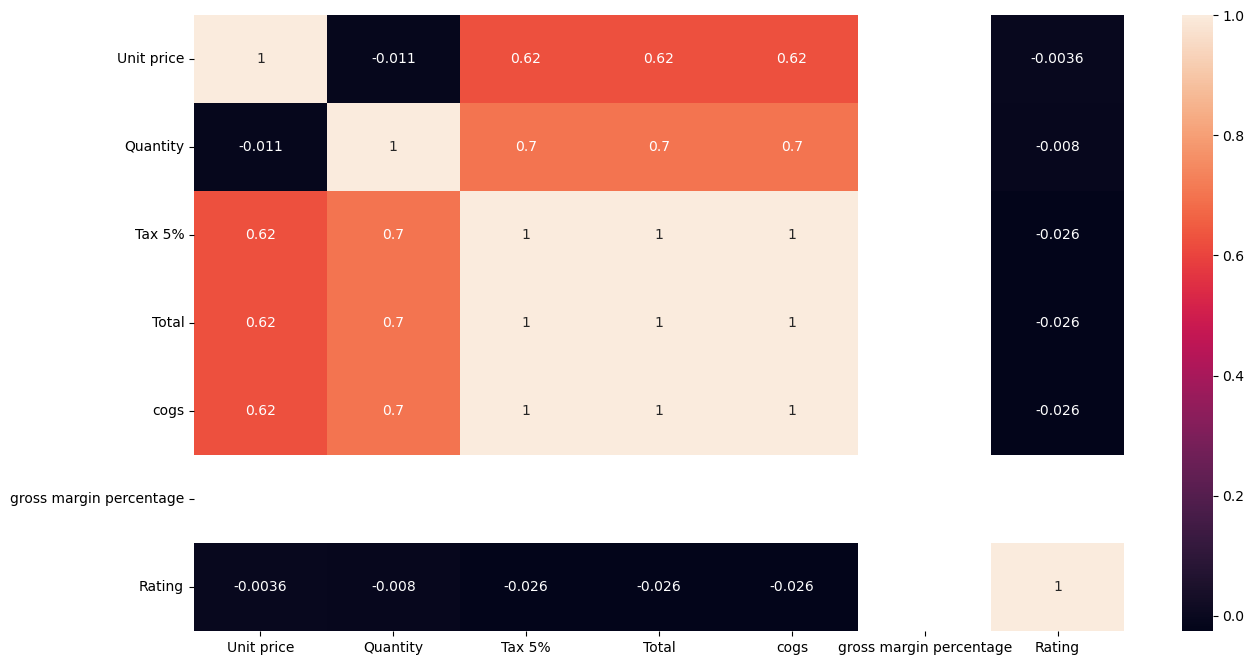

In [183]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Product line', ylabel='count'>

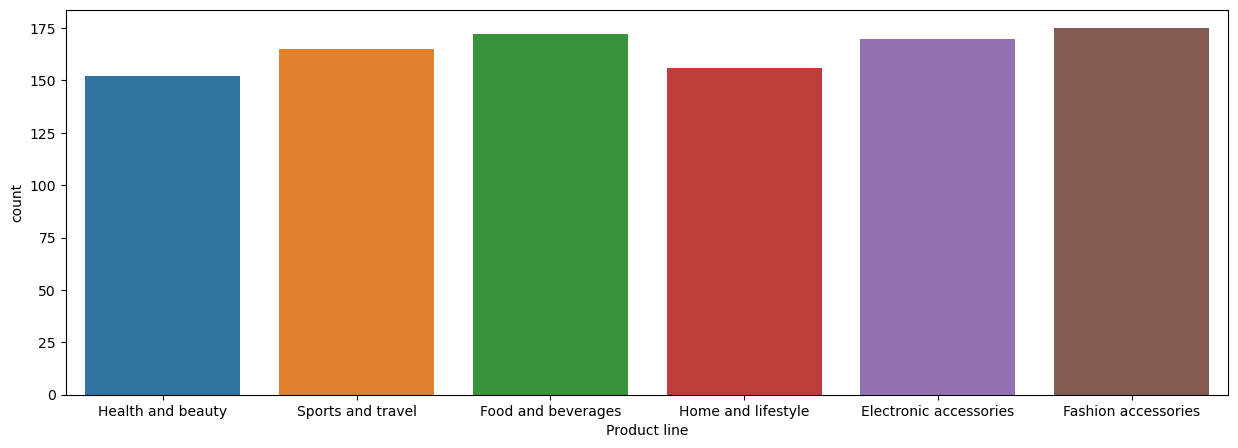

In [184]:
plt.figure(figsize=(15,5))
sns.countplot(x='Product line',data=df)

<AxesSubplot:xlabel='Rating', ylabel='count'>

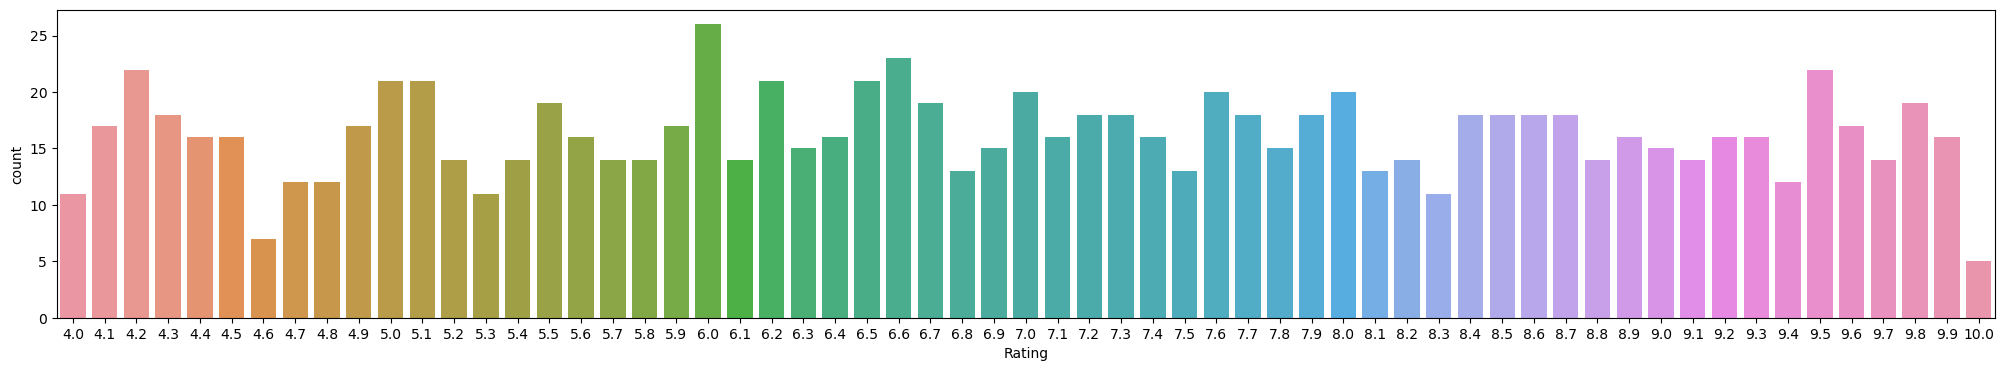

In [193]:
plt.figure(figsize=(25,4))
sns.countplot(x='Rating',data=df)

<AxesSubplot:xlabel='Rating', ylabel='Unit price'>

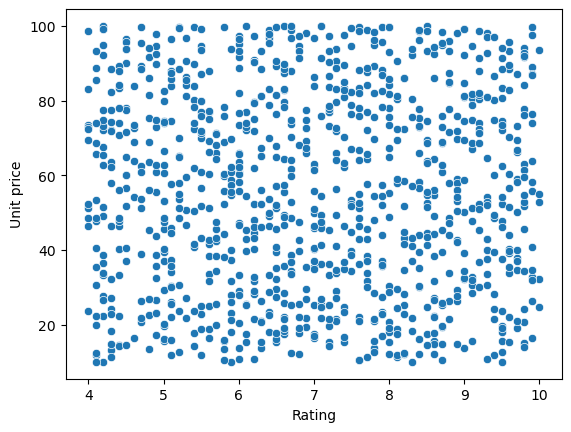

In [197]:
sns.scatterplot(x=df['Rating'], y=df['Unit price'])